# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [103]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

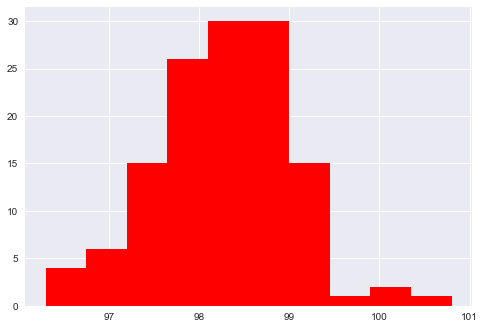

-0.004367976879081625 98.3 98.24923076923078 0    98.0
dtype: float64


In [104]:
x = df['temperature']
plt.hist(x, color = 'red')
plt.show()
print(scipy.stats.skew(x), x.median(), x.mean(), x.mode())

1.The distribution of body temperatures falls within the exceptable range of skew values for the data to still be considered a normal univariate distribution. I double checked by calculating mode, median and mean which were 98, 98.3, and 98.25 respectively meaning that even though in the histogram it looks like the distribution may be skewed to the right the distribution is actually normal. 

2.The sample size is 129 and is made up of independent observations, measuring one person's body temperature shouldn't change the readings taken of other people's body temperature. The sample size is larger than 30, which is the minimum number given for a sample to be representative of a population if the data closely resembles a normal curve, which this data does. For a more detailed answer about the ability of this sample size to be used to generalize to the over all population we would need to decide margin of errors and confidence intervals. 

In [105]:
print(x.mean())
print(scipy.stats.ttest_1samp(x, 98.6))
print(scipy.stats.zscore(x))

98.24923076923078
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
[ 1.43870478  0.20643202 -0.61508316  1.30178559 -0.34124477  1.30178559
 -0.34124477  0.7541088   0.20643202  0.48027041  0.7541088  -2.12119432
 -0.06740637  0.61718961 -0.61508316  0.7541088   0.06951282 -0.06740637
 -1.43659834  1.57562398  0.06951282 -0.06740637  0.48027041  0.20643202
 -0.61508316 -0.34124477 -0.61508316 -0.06740637  0.20643202 -0.20432557
  0.06951282 -0.88892155  0.34335121  0.48027041  1.43870478  1.71254318
  1.16486639  0.06951282 -0.47816396 -2.5319519   0.20643202  0.20643202
 -1.84735592 -1.43659834  1.0279472  -0.47816396 -1.16275994 -1.16275994
 -0.47816396 -1.57351753  0.891028    0.06951282  0.34335121  0.48027041
 -0.06740637  0.48027041  0.7541088  -0.06740637 -0.06740637 -0.88892155
  1.16486639  0.20643202 -0.06740637  0.48027041  0.61718961 -1.16275994
 -1.16275994  0.48027041  0.61718961  0.891028   -0.20432557 -0.75200235
 -0.34124477  0.7541088   

3.The true of this data set is not 98.6, when calculated the mean for this data set is actually about 98.25. I would use a one-sample t test for this data set unless I was also going to look at gender and the correlationship between gender and body temperature, in which case it would be more appropriate to use a two-sample t test. In this situation it would be more appropriate to use the t score rather than the z score because we do not know the standard deviation of the general population.The t test seems to suggest that the mean of the data set is not 98.6, and the p-value is verry small which means we can most like reject 98.6 as being the true mean of the population. When you look at the z scores you can see the individual variation from the mean of the data set. Most of the numbers in the data set seem to be smaller than the true mean of 98.6 which is what one would expect if the mean of this data set is coming out to be 98.25 rather than 98.6. 

In [106]:
y = x.sample(n=10)
print(scipy.stats.ttest_1samp(y, 98.6))
print(scipy.stats.zscore(y))

Ttest_1sampResult(statistic=-1.6888199063417857, pvalue=0.12552097021324457)
[ 1.68881991  0.18764666  1.12587994  0.18764666 -0.93823328 -2.06411322
  0.56293997 -0.18764666  0.         -0.56293997]


4.After drawing a sample from the data set and rerunning the tests we get a much smaller tscore and larger p value. The p value is still relatively small though and the results of the t test suggest that the true population mean could be 98.6. The z scores of the sample are relatively the same as in the data set as a whole, but the values which were further away from the true mean of 98.6 were not sampled here which may also explain why the t score here makes it harder to reject the hypothesis that the true mean of the population is 98.6. The z score is probably a better indication of the variation from the hypothesis in the data set itself while the t score is just an indication of the data set overall. Using the z score may be helpful if there are outliers in the data set or random error to see which data points may be causing us to get a higher t score. 

In [107]:
# taken from https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h, h

print(mean_confidence_interval(x, confidence=0.95))
print(scipy.stats.tsem(x) * 1.96)
print(98.25 - x.std(), 98.25 + x.std())

(98.249230769230749, 98.122002905608014, 98.376458632853485, 0.1272278636227305)
0.126036657002
97.51681684196106 98.98318315803894


5.Someone's temperature should be considered abnormal when it is more than two standard deviations from the mean which would be anything below 97.5 and above 99.0. Using the confidence interval though we should consider a temperature abover 98.38 or below 98.12 abnormal. 

In [108]:
g = df[['gender', 'temperature']]
fem = g[g.gender == 'F']
men = g[g.gender == 'M']

print(fem.mean())
print(men.mean())
print(scipy.stats.ttest_ind(fem['temperature'], men['temperature']))

temperature    98.393846
dtype: float64
temperature    98.104615
dtype: float64
Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)


6.I used an unpaired t test to analyze the difference in the mean body temperature by gender and the p value indicates that there is a significant difference in the means which indicates that gender does relate to body temperature. 

Carl Wunderlich's 1868 book reported that human beings have an average body temperature of 98.6 degrees fahrenheit. We wanted to compare this to our dataset which was a collection of 129 people's body temperature and gender. Our data set had an average body temperature of 98.25 with the average temperature for females being 98.4 and the average temperature for males being 98.1. Our average is significantly different than the true population mean of 98.6, which means that we either did something while collecting the data that lead us to have a lower average or that the true mean should be reevaluted. There might be outliers in our dataset because random sampling of it gives us a smaller t score and larger p value which means that there might not be as much of significant difference between the true population mean and our data set. We also compared the body temperatures for females versus males and found a statistically significant difference between them, indicating that gender does correlate to temperature. 